# Példa 8.2

Laboratóriumi használatra készült hengeres tartályban a gáz nyomása $p=15 \, \rm{bar}$. A tartály közepes átmérője $D=250\, \rm{mm}$. A Mohr-féle elmélet alkalmazásával határozzuk meg a szükséges falvastagságot,
 ha a megengedett feszültség $\sigma_{\mathrm{meg}}=92\,\rm{MPa}$!


# Megoldás

Betöltjük a `sympy` modult. Definiáljuk a szimbólumokat és adatokat.

In [1]:
import sympy as sp
sp.init_printing()

p, D, v, σ_meg = sp.symbols("p, D, v, σ_meg")

p_adat = 1.5 #MPa
D_adat = 250 #mm
σ_meg_adat = 92 #MPa
adatok = [(p,p_adat),(D,D_adat),(σ_meg,σ_meg_adat)]

A meridián és tangenciális feszültségek képlete:
$$\sigma_m=\frac{p\varrho_t}{2v},$$

$$\sigma_t=\sigma_m \left( 2-\frac{\varrho_t}{\varrho_m}\right),$$
ahol $\varrho_t = D$ és $\varrho_m = \infty$, mert a tartályunk hengeres.

A tartály falára ható terhelést a következő ábrán szemléltetjük.
<img src="Fig_8.2.png" style="width: 500px;">

Ekkor egy belső felületi pontban a feszültség:
$$\boldsymbol{\sigma}=\left[\begin{matrix} \sigma_m & 0 & 0\\ 0 & \sigma_t & 0\\ 0 & 0 & -p \end{matrix}\right].$$

Ezek közül a legnagyobb főfeszültség $\sigma_1=\sigma_t$, a legkisebb $\sigma_3=-p$. A Mohr-féle egyenértékű feszültség:

$$\sigma_1-\sigma_3.$$

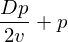

In [2]:
σ_m = p*D/4/v
σ_t = 2*σ_m #mert ϱ_m = ∞

σ_1 = σ_t
σ_3 = -p

σ_egy = σ_1-σ_3
σ_egy

Ebbe a kifejezezésbe (ne felejtsük 0-ra rendezni, azaz a megengedett feszültséget kivonni a fenti kifejezésből) kell behelyettesítenünk az adatokat, majd kifejeznünk belőle $v$-t.

In [3]:
σ_egy_adatok = (σ_egy-σ_meg).subs(adatok)
v_sol = sp.solve(σ_egy_adatok,v)
v_sol = v_sol[0]
v_sol.evalf(5) #mm